## Nedbørsoppgaven Del 3: Plotting av tidsserier

Når man skal jobbe med et datasett er å lage figurer et av de viktigste verktøyene man har. Dette gjelder i starten når man prøver å få oversikten over dataene, men også seinere når man skal presentere resultater.

I denne oppgaven skal vi se på tidsserier. I oppgaven "Figurer" er denne oppgaven inkludert, men også et par flere måter å visualiere data. 
Vi kommer også såvidt innom hvordan man bruker dokumentasjonen til funksjonene man bruker.

#### Last inn pakkene som trengs

In [2]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
import matplotlib
import requests # for filinnlasting
import io # for filinnlasting
from EkteDataFunk import loadData # for filinnlasting

En av de aller enkleste figurene er et linjeplot. For en funksjon f(x) er x langs første-aksen, og f(x) langs andre-aksen. I dette eksempelet har vi temperatur som en funksjon av tid, så vi får tid langs første-aksen og temperatur langs andre-aksen. 


#### 1. Last inn et datasett
Last inn et datasett å jobbe med. I denne oppgaven bruker vi års-temperatur i Bergen fra 1860 til 2020. Siden funkjsonen her er en funksjon av tid er dette en tidsserie. 
I oppgaven "RyddDatasett" og "Funksjoner" er det detaljer på hvordan filinnlastingen fungerer.

In [3]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)

#### 2. Lag en figur 
Vi lagde figurer i både del 1 og 2, men man kan lage veldig mye mer ryddige og informative figurer enn det vi så på i de to delene. Aller helst skal man kunne se på en figur uten caption og ganske lett kunne skjønne hva dataene viser. Men dette forutsetter gode figurer med navn på aksene, tittel, fargekoding av linjer dersom det er flere og "legends" (symbol/fargeforklaring av linjene). 

I denne oppgaven går vi kun gjennom eksempler på linjeplot, men om du er interessert i flere eksempler kan du titte på oppgaven "Figurer.ipynb" som også ligge i GitHub repoet til EkteData. 

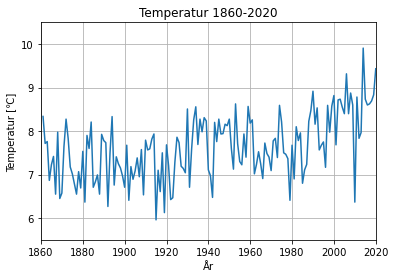

In [4]:
# Lag akser å plotte i. Dette er ikke strengt tatt nødvendig for å lage en 
# figur, men gjør at du lettere kan definere størrelsen på figuren, definere 
# grid, tekst osv. på ryddig vis som under. 
ax=plt.axes()

# Plot tidsserien
ax.plot(tid, temp)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.5,10.5]) # Sett grense for y-aksen
ax.grid()  # Legg til rutenett (grid) i bakgrunnen
plt.show() # Denne linjen er kun med så vi slipper unødvendig tekstoutput. 
           # Du kan jo kommentere den ut for å se om du vil. 

#### 3. Spesifisering av farger, linjestil, markører etc. 

**Notat på å bruke dokumentasjon**
Man har mye valgfrihet når man skal lage figurer. Alle farger, tekststørrelse, figurstørrelse, akser, grenser, verdier/tekst langs aksene og mye mer kan endres. Det enkleste å gjøre når man skal finne ut hvordan man skal endre på noe er å lese dokumentasjon til funksjoner i `matplotlib`. `matplotlib` er et stort bibliotek for plotting av figurer i python, og det meste du trenger finnes her. Det skal sies at det å lese dokumentasjon er en treningssak. Det kan være overveldende i starten, og vanskelig å finne ut hvor i all informasjonen den informasjonen du er på jakt etter finnes, men dette blir lettere etterhvert.

Si at du vil at linjen heller skal være oransje og at alle faktiske datapunkt skal være markert med en grønn femkant. Da ville jeg googlet f.eks. "matplotlib line color python", trykket meg inn på dokumentasjonslinken som kommer opp. I dette tilfellet kommer jeg til denne nettsiden https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html. 
Dette er en under-side i dokumentasjonen til Matplotlib. Ganske tidlig på siden er det noen eksempler på å endre linjefarge og sette markør, men for å finne informasjon om hvordan jeg setter markøren til en femkant og gjøre den grønn må man skrolle lengre ned på siden til man finner "Other Parameters:". Under ** kwargs (keyword arguemts) kommer en lang liste. Kolonnen "Properties" er det vi er ute etter. Dette er alle "keywordene" man kan gi til `plt.plot`, f.eks "color". Måten man bruker dette er f.eks. `plt.plot(tid,temp), color='green')`. Dette gir en grønn linje istedet for en blå. `color='green'` er et "keyword argument pair". For informasjon om hvert enkelt keyword trykker man på lenken deres og finner hvile mulige input de kan få.

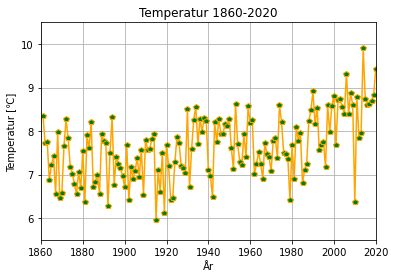

In [5]:
ax=plt.axes()

# Plot tidsserien, og definer hvordan linjen skal se ut
ax.plot(
    tid,temp,
    color='orange',
    marker='p',
    markerfacecolor='green')

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # sett grense for x-aksen
    ylim=[5.5,10.5]) # sett grense for y-aksen
ax.grid() # legg til rutenett (grid) i bakgrunnen
plt.show() 

#### Oppgave 1:
Lag samme figur som over, men bruk røde stjerner som markør og ingen linje istedet.

#### Oppgave 2:
Lag samme figur som over, men lag tittlen større. Dette krever et nytt søk i dokumentasjonen. Tips: inkluder "title" og "fontsize" i søkeordene dine. Plot i nye farger, markører og linjestil. Ha også forskjellig farge på selve markøren og kanten til markøren.

#### 4. Bestem figurstørrelsen
Default-størrelsen til figurene i Python er ikke alltid den beste til å presentere de dataene du vil visualisere. En tidsserie vil man f.eks. ofte strekke ut i horisontalen, mens iblant er det viktig at x- og y-aksene har like dimensjoner. Som med alt mulig annet i programmering finnes det mange måter å gjøre dette på, vi viser en måte her. I kompliserte figurer kan det iblant være vanskelig å finne et system i når man må bruke f.eks. `ax.` eller `fig.` eller `plt.`. Generelt er det slik at disse knaggene ("handles") hører til ulike akser i figuren. I eksempelet under er f.eks. "fig" hele figurområdet, mens "ax" kun er den aksen det faktisk plottes i. Forskjellen på dette blir tydelig når man har flere panel ("subplots", små figurer) på et stort figurområde. Figuren i bolk 6 er et eksempel på dette.   

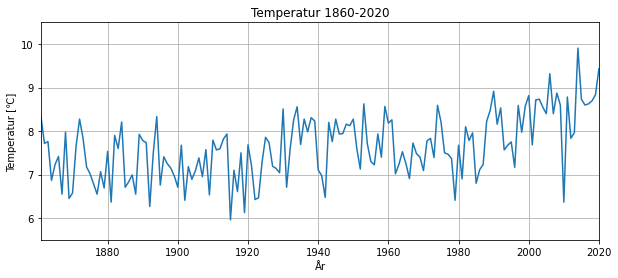

In [13]:
# Lag akser å plotte i, og bestem at den skal være 10 enheter langs x-aksen 
# og 4 enheter langs y-aksen.
fig=plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111) # Se figur i bolk 6 for forklaring på dette

# Plot tidsserien
ax.plot(tid,temp)

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(tid[0],tid[-1]), # sett grense for x-aksen
    ylim=[5.5,10.5]) # sett grense for y-aksen
plt.grid()
plt.show()

#### 5. Flere element i ett plot
Ofte har man flere elementer, f.eks., flere linjer i samme plot. Da trenger man informasjon om hva de ulike linjene representerer. For dette bruker vi `plt.legend`. "legend" er bokser med navn på linjene. Teksten som skal høre til hver linje defineres med "label" for hver linje. 

Man kan f.eks. lage en figur med både tidsserien og gjennomsnittet over hele perioden som en linje. 

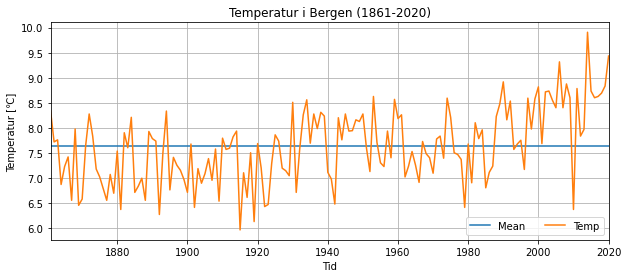

In [24]:
fig=plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111) # Se neste figur for forklaring på dette


string=('Temp','Mean')
ax.plot((tid[0],tid[-1]),(np.mean(temp),np.mean(temp)), label=string[1])
ax.plot(tid,temp, label=string[0]) 

ax.set(
    xlim=(1861,2020),
    xlabel='Tid',
    ylabel='Temperatur [\u2103]',
    title='Temperatur i Bergen (1861-2020)'
)

ax.legend(loc='lower right', ncol=len(string))


plt.grid()

#### 6. Subplot
Med "subplots" kan man ha flere panel i samme figur. Dette er nyttig f.eks. hvis man har tidsserier over samme periode for ulike variabler som temperatur, lufttrykk, og nedbør, eller havtemperatur og saltholdighet. 

Vi introduserer ikke et nytt datasett her i denne oppgaven, men plotter samme tidsserie i alle panelene. Linjen `ax = fig.add_subplot(xyz)` bestemmer hvor mange panel det skal være i figuren. `x` er antall rader med panel, `y` er antall kolonner med panel, og `z` er hvilket panel du plotter i akkurat nå. Over, der vi brukte `ax = fig.add_subplot(111)` var det altså 1 rad med panel, 1 kolonne med panel, og vi jobbet med det første panelet. 

Numereringen på subplottene starter i øvre venstre hjørne og ender i nedre høyre hjørne. Har man f.eks. `fig.add_subplot(23z)` er `z=1` øverst til venstre, `z=2` på midten øverst, og `z=6` nederst til høyre. 

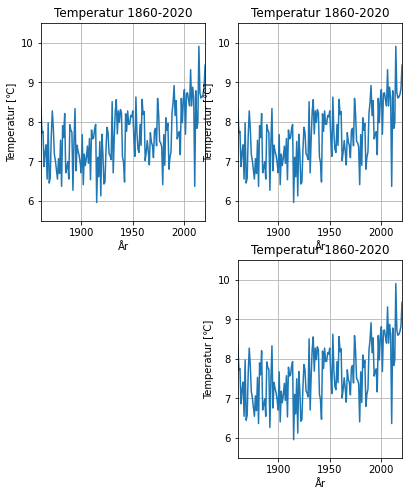

In [16]:
fig=plt.figure(figsize=(10, 8))

#-----Plot i panel nr1--------------------------------------------------------
ax = fig.add_subplot(231) 
ax.plot(tid,temp)
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(tid[0],tid[-1]), # sett grense for x-aksen
    ylim=[5.5,10.5]) # sett grense for y-aksen
plt.grid()

#-----Plot i panel nr2-------------------------------------------------------------------------------
ax = fig.add_subplot(232) 
ax.plot(tid,temp)
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(tid[0],tid[-1]), # sett grense for x-aksen
    ylim=[5.5,10.5]) # sett grense for y-aksen
plt.grid()

#-----Plot i panel nr5-------------------------------------------------------------------------------
ax = fig.add_subplot(235) 
ax.plot(tid,temp)
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(tid[0],tid[-1]), # sett grense for x-aksen
    ylim=[5.5,10.5]) # sett grense for y-aksen
plt.grid()
#-------------------------------------------------------------------------------


plt.show()

Man må ikke ha et perfekt grid med subplot slik som over, man kan f.eks. ha tre små panel i øvre rad og et langt panel i nedre rad, men dette krever behandling av aksene, noe vi ikke går gjennom her. Men det er mulig. 

#### Oppgave 3: 
Lag to nye figurer. I den ene figuren, plot punktene under i samme figur.  
- hele tidsserien, 
- hvert tiende datapunkt. Se på oppgaven om indeksering (Del 1) for tips. 
- hvert av disse datapunktene +/- standardavviket for hele tidsserien i lysegrå linjer. Numpy sin funksjon for standardavvik er np.std(). 

I figur nr 2, plot hele tidserien i et subplot, og resten i et annet subplot. 

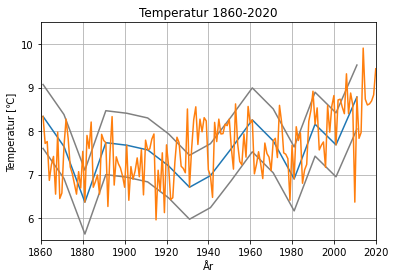

In [6]:
ax=plt.axes() # Lag akser å plotte i

# Plot tidsserien
ax.plot(tid[::10], temp[::10]+np.std(temp), color='grey')
ax.plot(tid[::10], temp[::10]-np.std(temp), color='grey')
ax.plot(tid[::10], temp[::10])
ax.plot(tid, temp)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.5,10.5]) # Sett grense for y-aksen
ax.grid() # Legg til rutenett (grid) i bakgrunnen
plt.show() # Denne linjen er kun med så vi slipper unødvendig tekstoutput. 
    

Hvordan synes du hver tiende datapunkt representerer den originale tidsserien? Holder det å bare plotte hvert tiende datapunkt for å få frem hovedbudskapet? Hvilken informasjon får du ut av linjene med standardavvik?

Det er nok mange ting å forbedre med denne figuren, men to ting skal vi se på i oppgaven om "for-løkker" og til slutt i hovedoppgaven. **Det første** er at det ofte er bedre å se på gjennomsnittet av intervaller heller enn en eksempelverdi fra intervallet. I dette eksempelet ville man f.eks. plottet et gjennmonsnitt av hver tiårsperiode heller enn hver tiende verdi. **Det andre** er at verdier som standardavviket ofte endrer seg over tid. Derfor er det gjerne mer informativt å plotte standaravvik for intervallet, f.eks. hver tiårsperiode som her, heller enn standardavviket for hele tidsserien. Men for dette må man iterere gjennom intervallene man vil dele datasettet sitt inn i, og for dette trenger man ofte for-løkker. Vi kommer tilbake til dette i Del 5. 

